In [0]:
import pandas as pd
import datetime 
import pandas_datareader.data as web
import numpy as np

In [0]:
from pandas import Series,DataFrame

In [0]:
start=datetime.datetime(2010,1,1)
end=datetime.datetime(2017,1,11)
df=web.DataReader("AAPL",'yahoo',start,end)

In [0]:
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-28,118.019997,116.199997,117.519997,116.760002,20905900.0,111.871452
2016-12-29,117.110001,116.400002,116.449997,116.730003,15039500.0,111.842705
2016-12-30,117.199997,115.430000,116.650002,115.820000,30586300.0,110.970810
2017-01-03,116.330002,114.760002,115.800003,116.150002,28781900.0,111.286987
2017-01-04,116.510002,115.750000,115.849998,116.019997,21118100.0,111.162437
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,111.727715
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.973305
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.008080
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,114.123047


In [0]:
#noise clearing or price data smoothening
#rolling_mean
close_px=df['Adj Close']
mavg=close_px.rolling(window=100).mean()

df['Adj Close'].tail(10)

Date
2016-12-28    111.871452
2016-12-29    111.842705
2016-12-30    110.970810
2017-01-03    111.286987
2017-01-04    111.162437
2017-01-05    111.727715
2017-01-06    112.973305
2017-01-09    114.008080
2017-01-10    114.123047
2017-01-11    114.736275
Name: Adj Close, dtype: float64

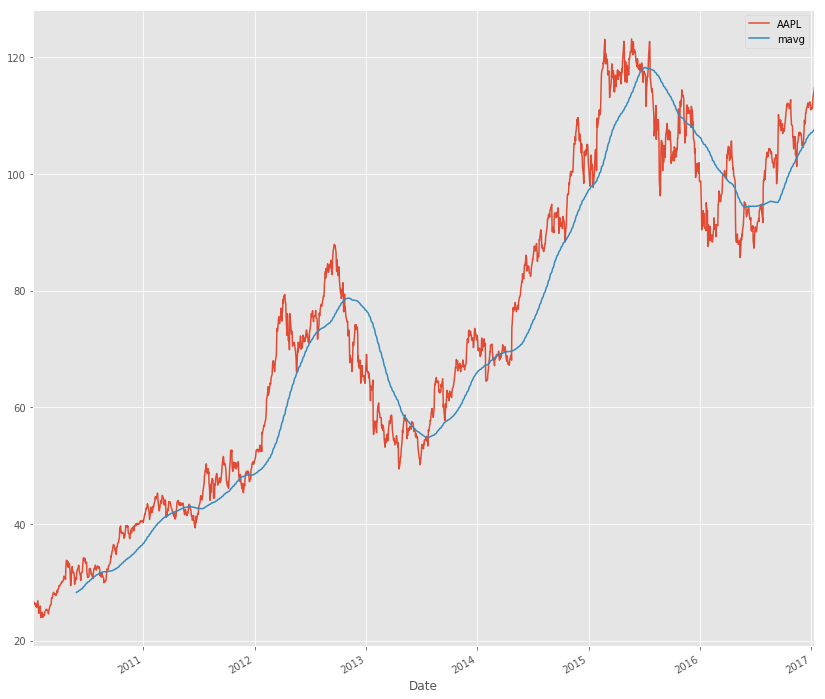

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style

#Adjusting size of matplotlib
import matplotlib as mpl
mpl.rc('figure',figsize=(14,13))
mpl.__version__

#Adjusting the style
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')

plt.legend()
plt.show()



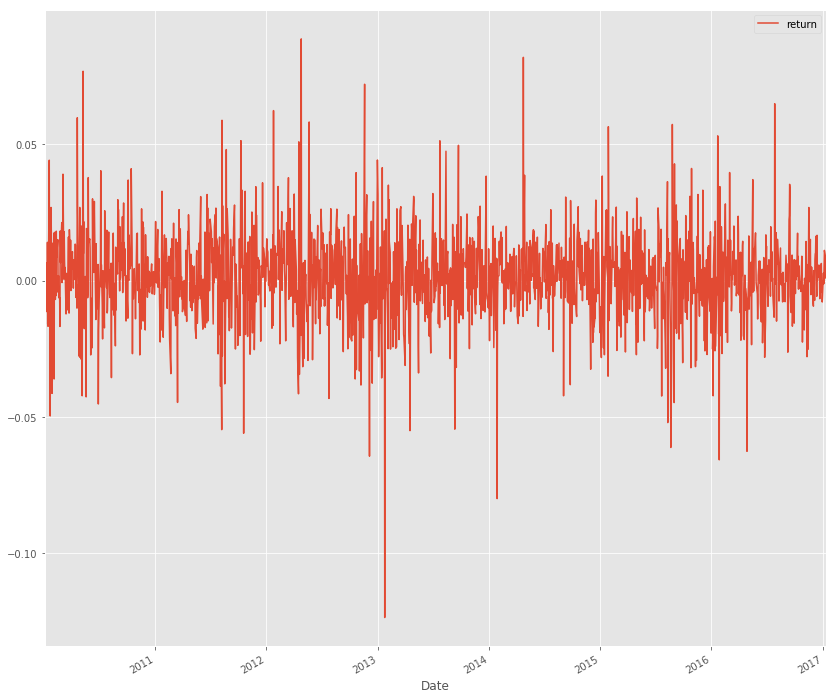

In [0]:
returns=close_px/close_px.shift(1)-1
returns.plot(label='return')
plt.legend()
plt.show()

In [0]:
#converting the dataset to useful parameters
dfreg=df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT']=(df['High']-df['Low'])/df['Close']*100
dfreg['PCT_Change']=(df['Close']-df['Open'])/df['Open']*100

print(dfreg)


             Adj Close       Volume    HL_PCT  PCT_Change
Date                                                     
2010-01-04   26.681330  123432400.0  0.990606    0.271752
2010-01-05   26.727465  150476200.0  1.091520   -0.102519
2010-01-06   26.302330  138040000.0  2.123523   -1.590633
2010-01-07   26.253704  119282800.0  1.400893   -0.552538
2010-01-08   26.428249  111902700.0  1.386924    0.798864
2010-01-11   26.195114  115557400.0  2.165531   -1.264095
2010-01-12   25.897146  148614900.0  1.612746   -0.702707
2010-01-13   26.262434  151473000.0  3.242343    1.337373
2010-01-14   26.110340  108223500.0  0.687577   -0.323641
2010-01-15   25.673977  148516900.0  2.782498   -2.370452
2010-01-19   26.809748  182501900.0  3.696984    3.220848
2010-01-20   26.397085  153038200.0  2.857409   -1.479692
2010-01-21   25.940775  152038600.0  2.931702   -1.890795
2010-01-22   24.654148  220441900.0  5.228822   -4.366963
2010-01-25   25.317411  266424900.0  2.220907    0.276529
2010-01-26   2

In [0]:
import math
import sklearn 
from sklearn import preprocessing
dfreg.fillna(value=-99999, inplace=True)#missing values
forecast_out=int(math.ceil(0.01*len(dfreg)))#1 percent for forecast

#separating label and forecasting the Adj Close
forecast_col='Adj Close'
dfreg['label']=dfreg[forecast_col].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

#scaling X for same distribution
X = preprocessing.scale(X)




In [0]:
#for late X(find) and early X(train) result
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

#separate label as y 
y=np.array(dfreg['label'])
y=y[:-forecast_out]

In [0]:
#models for prediction
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [0]:
#spliting for training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [0]:
#MODEL 1
#Linear Regression
clfreg=LinearRegression(n_jobs=-1)
clfreg.fit(X_train,Y_train)

#MODEL 2
#Quadratic Regression 2
clfpol2=make_pipeline(PolynomialFeatures(2),Ridge())
clfpol2.fit(X_train,Y_train)
#Qudratic Regression 3
clfpol3=make_pipeline(PolynomialFeatures(3),Ridge())
clfpol3.fit(X_train,Y_train)
#MODEL 3
#KNN Regression

clfknn=KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train,Y_train)






KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [0]:
confidencereg = clfreg.score(X_test, Y_test)
confidencepoly2 = clfpol2.score(X_test,Y_test)
confidencepoly3 = clfpol3.score(X_test,Y_test)
confidenceknn = clfknn.score(X_test, Y_test)

print(confidencereg )
print(confidencepoly2)
print(confidencepoly3)
print(confidenceknn)

0.9719574123804554
0.9614831991002788
0.963156308692635
0.9441955548813696


In [0]:
#Linear Regression Prediction
forecast_set=clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set)

[110.34513901 110.25152381 111.56602988 111.59639354 111.51970182
 110.94460219 111.36918648 112.17820009 112.10931397 111.47994452
 111.01162686 111.11640532 110.73251166 111.35416974 112.61935692
 113.44500246 113.60989619 114.18645464]


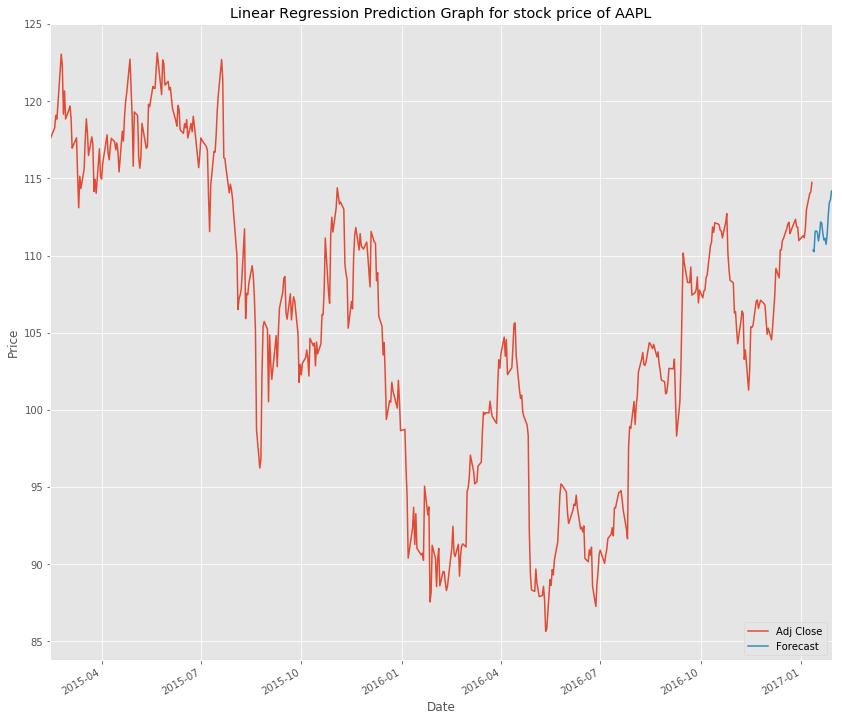

In [0]:
#Linear Regression Prediction Graph
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Prediction Graph for stock price of AAPL')
plt.show()

In [0]:
#Quadratic Regression 2 Prediction
forecast_set1=clfpol2.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set1)

[109.40762244 109.39301946 111.11012453 111.33895304 111.19730228
 110.58857541 111.42732068 111.99258415 111.93933156 111.4696835
 110.58766242 110.69074305 110.58275831 111.11109718 111.87070572
 112.52890663 113.01123359 113.39123524]


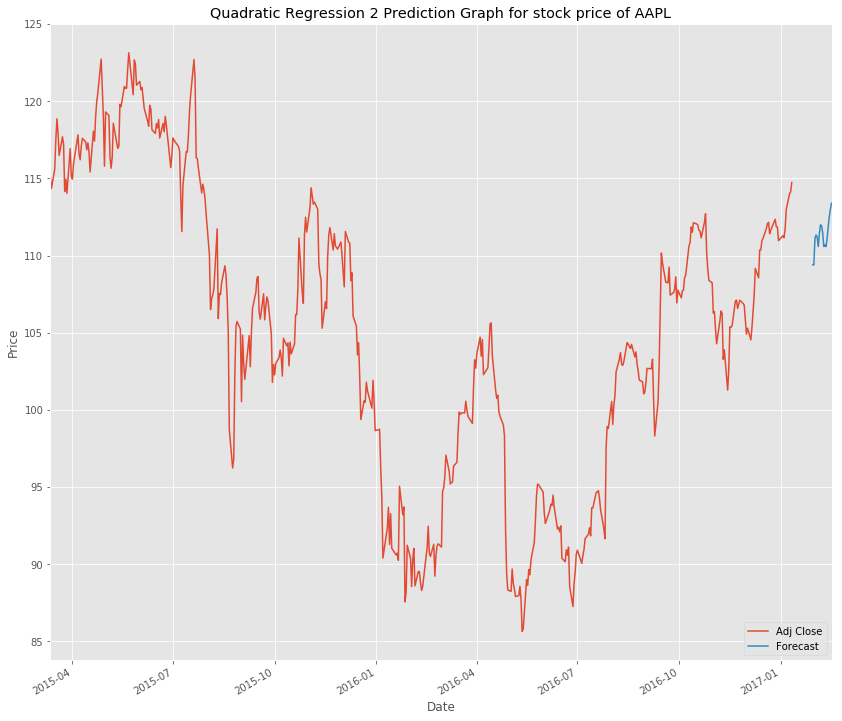

In [0]:
#Quadratic Regression 2 Prediction Graph
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set1:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Quadratic Regression 2 Prediction Graph for stock price of AAPL')
plt.show()

In [0]:
#Quadratic Regression 3 Prediction 
forecast_set2=clfpol3.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set2)

[109.41194565 108.21464254 110.63716589 110.35068738 110.11177634
 109.55373209 110.91624597 111.30359356 110.74978518 110.51124625
 109.65667579 110.18747106 109.67274175 110.52189539 111.36047571
 111.97669405 111.93576179 112.57400262]


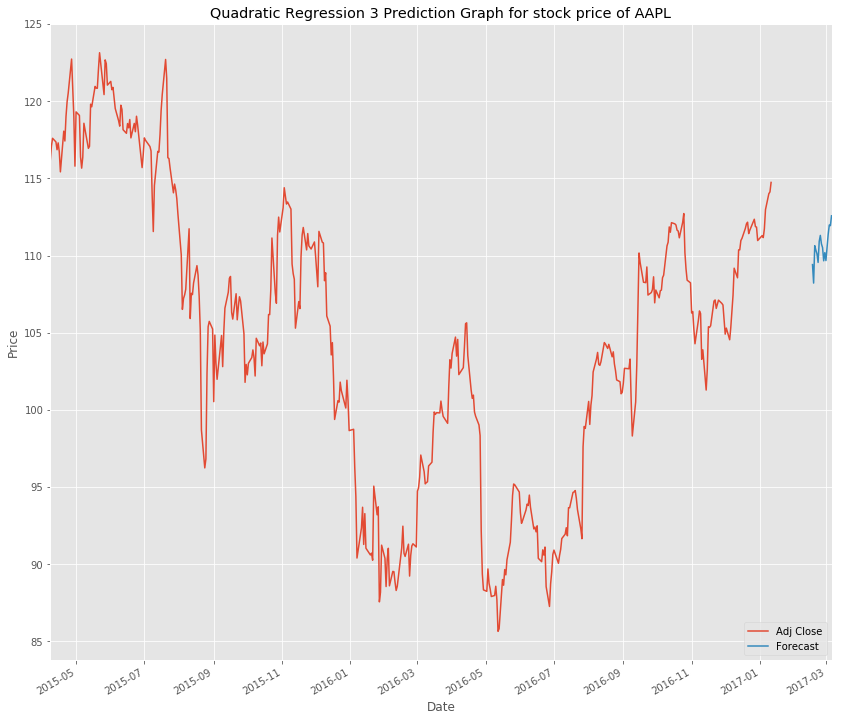

In [0]:
#Quadratic Regression 3 Prediction Graph
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set2:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Quadratic Regression 3 Prediction Graph for stock price of AAPL')
plt.show()

In [0]:
#K Nearest Neighbor Prediction 
forecast_set3=clfknn.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set3)

[110.34494019 112.58226395 103.22626877 107.21224976 108.24702454
 103.98313904 108.75272369 112.76696777 102.93068314 108.24702454
 102.93068314 108.41541672 107.21224976 108.75272369 114.35897064
 115.41159439 107.62691116 115.41159439]


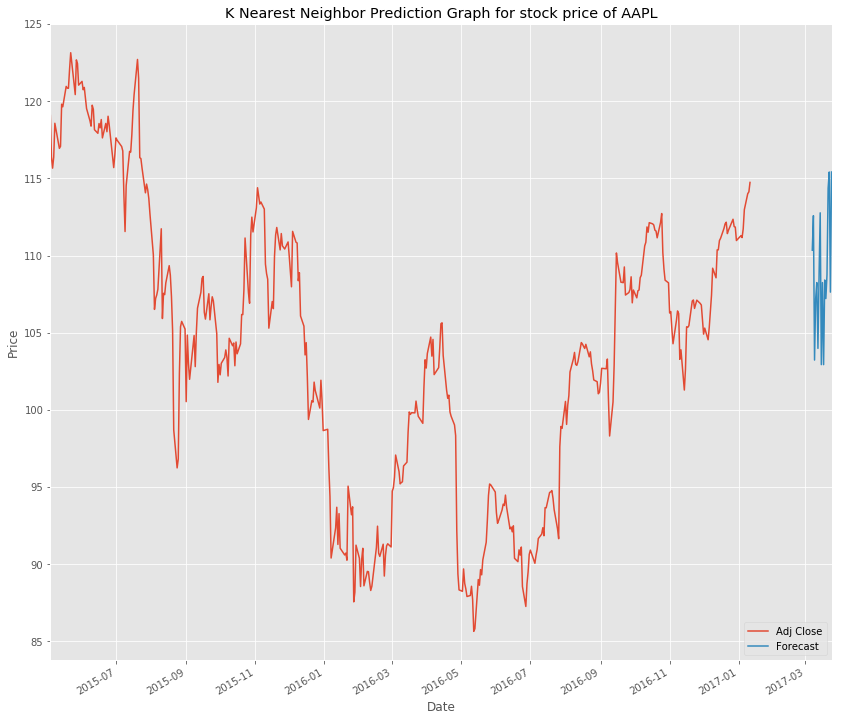

In [0]:
#K Nearest Neighbor Prediction Graph
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set3:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('K Nearest Neighbor Prediction Graph for stock price of AAPL')
plt.show()